Best Model - Decision Tree
Lowest RMSE value among all the regression model.

In [1]:
#import library
import numpy as np
import pandas as pd

#to ensure we have consistent results
np.random.seed(42)

In [2]:
#Load the dataset
print('==> Loading the dataset...')
insurance=pd.read_csv("dataset2.csv")
print('done\n')

==> Loading the dataset...
done



In [3]:
insurance.columns

Index(['Agency', 'Distribution Channel', 'Product Name', 'Claim', 'Duration',
       'Destination', 'Net Sales', 'Age'],
      dtype='object')

In [4]:
#display dataset
insurance
#display first 5 rows
insurance.head()

,Agency,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Age
0,0,0,0,0,119.0,0,-27.0,55.0
1,0,0,0,0,119.0,0,-27.0,55.0
2,1,1,1,0,65.0,1,-27.0,32.0
3,1,1,1,0,60.0,1,-27.0,32.0
4,1,1,1,0,79.0,2,-19.8,41.0


In [5]:
#print statistic
insurance.describe()

,Agency,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Age
count,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000
mean,3.907526,0.982519,6.293702,0.014639,37.012711,12.208445,35.140900,38.403941
std,2.155826,0.131056,3.818476,0.120102,36.180467,12.611972,26.595704,8.532404
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-27.000000,23.000000
25%,4.000000,1.000000,3.000000,0.000000,9.000000,4.000000,18.000000,35.000000
50%,4.000000,1.000000,6.000000,0.000000,22.000000,9.000000,26.530000,36.000000
75%,4.000000,1.000000,9.000000,0.000000,53.000000,14.000000,48.000000,43.000000
max,15.000000,1.000000,25.000000,1.000000,119.000000,148.000000,93.000000,55.000000


In [6]:
#print statistic for net sales
insurance['Net Sales'].describe()

count    63326.000000
mean        35.140900
std         26.595704
min        -27.000000
25%         18.000000
50%         26.530000
75%         48.000000
max         93.000000
Name: Net Sales, dtype: float64

In [50]:
#row with max value of net sales and sort by descending Duration
maximum=insurance[insurance['Net Sales'] == insurance['Net Sales'].max()]
print(maximum.sort_values(by=['Duration'], ascending=False))

       Agency  Distribution Channel  Product Name  Claim  Duration  \
37339       5                     1            14      0     119.0   
52191       5                     1             8      1     119.0   
52403       5                     1             8      0     119.0   
52402       5                     1             8      0     119.0   
52199       5                     1            14      1     119.0   
...       ...                   ...           ...    ...       ...   
43991       4                     1            10      0       2.0   
40177       4                     1            10      0       2.0   
12432       4                     1            10      0       2.0   
18289       6                     1             2      0       1.0   
61560       4                     1            10      0       1.0   

       Destination  Net Sales   Age  
37339            9       93.0  35.0  
52191            9       93.0  35.0  
52403            9       93.0  30.0  
52402  

In [49]:
#row with min value of net sales and sort by ascending Duration
minimum=insurance[insurance['Net Sales'] == insurance['Net Sales'].min()]
print(minimum.sort_values(by=['Duration'], ascending=True))

       Agency  Distribution Channel  Product Name  Claim  Duration  \
39245       4                     1             9      0       2.0   
4735        1                     1             1      0       4.0   
9935        4                     1            10      0       5.0   
39254       6                     1             2      0       5.0   
40569       4                     1             9      0       5.0   
...       ...                   ...           ...    ...       ...   
22677       4                     1             9      0     119.0   
33567       1                     1             1      0     119.0   
22668       4                     1            10      0     119.0   
52133       5                     1             8      0     119.0   
0           0                     0             0      0     119.0   

       Destination  Net Sales   Age  
39245            0      -27.0  36.0  
4735            11      -27.0  31.0  
9935            62      -27.0  42.0  
39254  

In [9]:
#Split the data set into the input matrix and output vector
x= insurance.drop('Net Sales', axis=1)
y=insurance['Net Sales']

In [10]:
#display x 
#Dataset that have remove column Claim
x

,Agency,Distribution Channel,Product Name,Claim,Duration,Destination,Age
0,0,0,0,0,119.0,0,55.0
1,0,0,0,0,119.0,0,55.0
2,1,1,1,0,65.0,1,32.0
3,1,1,1,0,60.0,1,32.0
4,1,1,1,0,79.0,2,41.0
...,...,...,...,...,...,...,...
63321,2,1,3,0,111.0,10,31.0
63322,2,1,3,0,58.0,14,40.0
63323,2,1,3,0,2.0,0,55.0
63324,2,1,3,0,3.0,7,55.0


In [11]:
#display the vector y[what we want to predict]
#column 'Net Sales' only
y

0       -27.0
1       -27.0
2       -27.0
3       -27.0
4       -19.8
         ... 
63321    35.0
63322    40.0
63323    18.0
63324    18.0
63325    26.0
Name: Net Sales, Length: 63326, dtype: float64

In [12]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 63326 entries, 0 to 63325
Series name: Net Sales
Non-Null Count  Dtype  
--------------  -----  
63326 non-null  float64
dtypes: float64(1)
memory usage: 494.9 KB


In [44]:
#Split the dataset into training and testing set
#80% training set
#20% test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=30)

In [46]:
#Standardize numeric data and normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=False)
scaler.fit(x_train)
x_train=scaler.transform(x_train)
print(y_test)

47929    20.00
37647    25.00
775      35.25
10951    93.00
14366    93.00
         ...  
25091    20.00
37183    85.00
50345    93.00
55643    24.00
51578    76.00
Name: Net Sales, Length: 12666, dtype: float64


In [15]:
y_train = y_train.values;  #convert to numpy array
#print the total number of rows and column
print('x_train.shape:', x_train.shape) 
print('y_train shape:', y_train.shape)

x_train.shape: (50660, 7)
y_train shape: (50660,)


# Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeRegressor
#use train dataset
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
y_pred=tree_reg.predict(x_train)

#predict using the same training data
#y_train should be similar to y_predict
#predict value similar to the actual value

In [18]:
def show10results(y_train, y_pred):
    print('Result for the 10 random samples: ')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))

y_pred=tree_reg.predict(x_train)#predict
show10results(y_train, y_pred)

Result for the 10 random samples: 
actual =       0 pred =     25
actual =      10 pred =     15
actual =      20 pred =     20
actual =      10 pred =     15
actual =      13 pred =     13
actual =      93 pred =     93
actual =      30 pred =     58
actual =      32 pred =     27
actual =      16 pred =     16
actual =      13 pred =      7


In [19]:
#calculate root mean square error
from sklearn.metrics import mean_squared_error

tree_mse=mean_squared_error(y_pred, y_train)
tree_rmse=np.sqrt(tree_mse)
print('RMSE =', tree_rmse)

RMSE = 12.461528247783908


In [20]:
insurance['Net Sales'].mean()

35.140899946309915

# Evaluating using cross validation

In [21]:
from sklearn.model_selection import cross_val_score

k_fold_scores = cross_val_score(tree_reg, x_train, y_train, 
                                scoring = 'neg_mean_squared_error', cv=5)

tree_reg_rmse_scores = np.sqrt(-k_fold_scores)

def display_scores(scores):
    print('Scores:', scores, '\n')
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(tree_reg_rmse_scores)

Scores: [25.34194932 25.624814   25.71023705 25.72942599 25.3929443 ] 

Mean: 25.559874131904856
Standard deviation: 0.16182139575357285


In [22]:
#cross validation predict
from sklearn.model_selection import cross_val_predict

# perform cross-validatied prediction using cross_val_predict
y_pred_cv = cross_val_predict(tree_reg, x_train, y_train, cv=3)

def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
peek_results(y_train, y_pred_cv)  

actual |  Predicted
------------------
21.0  | 24.25
41.0  | 34.166666666666664
39.6  | 93.0
31.0  | 27.333333333333332
20.0  | 25.0
20.0  | 20.5
16.0  | 13.0
79.2  | 29.7
-27.0  | 19.8
11.0  | 14.0
59.4  | 39.6
62.0  | 54.0
62.0  | 38.42857142857143
80.0  | 80.0
45.0  | 45.0
10.0  | 10.0
14.0  | 27.636363636363637
10.0  | 15.73913043478261
39.6  | 36.300000000000004
22.0  | 20.0


In [23]:
y_train=pd.DataFrame(y_train)
y_pred_cv=pd.DataFrame(y_pred_cv)

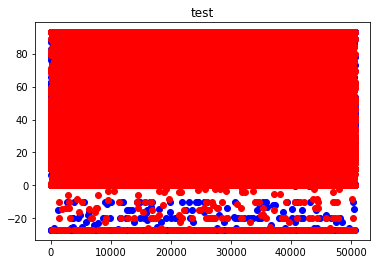

In [24]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_train,y_pred_cv,regressorName):
    if max(y_train) >= max(y_pred_cv):
        my_range = int(max(y_train))
    else:
        my_range = int(max(y_pred_cv))
    plt.scatter(range(len(y_train)), y_train, color='blue')
    plt.scatter(range(len(y_pred_cv)), y_pred_cv, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test1 = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_train, y_pred_cv, "test")

# Fine Tuning 

In [25]:
#define parameters
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


In [26]:
from sklearn.model_selection import GridSearchCV

# create an instance of GridSearchCV using param_grid with 5-fold cv
grid_search = GridSearchCV(tree_reg, parameters, cv=5, scoring = 'neg_mean_squared_error')
print ('Performing grid search...', end = '')
# perform grid search
grid_search.fit(x_train, y_train)
print('done')

Performing grid search...

C:\Users\shinj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shinj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shinj\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\shinj\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_f

done


C:\Users\shinj\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-659.22807343 -702.16648364 -668.03913604 ...           nan           nan
           nan]
  warnings.warn(


In [27]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1, random_state=42)

In [28]:
print('Best hyperparameter settings:', grid_search.best_params_)
print('RMSE of the best model =', np.sqrt(-grid_search.best_score_))

Best hyperparameter settings: {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
RMSE of the best model = 24.56608788802366


# Test Data

In [37]:
#Standardize numeric data and normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=False)
scaler.fit(x_test)
x_test=scaler.transform(x_test)


range(0, 10)


In [47]:
y_test = y_test.values;  #convert to numpy array
#print the total number of rows and column
print('x_test.shape:', x_test.shape) 
print('y_test shape:', y_test.shape)



x_test.shape: (12666, 7)
y_test shape: (12666,)


In [48]:
#predicting on the test case
y_pred=best_model.predict(x_test)
final_mse=mean_squared_error(y_test, y_pred)
final_rmse=np.sqrt(final_mse)
final_rmse

C:\Users\shinj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


32.779178644311756